In [110]:
import ROOT
import uproot
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak

from sklearn.preprocessing import normalize as norm

In [111]:
FILE_PATH = "../Dati/Run_Na_Couples_CDF20_Data_5_9_2024_Ascii.root" #Relative file path
file = uproot.open(FILE_PATH)
file["tree"].show() #Display contents

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
ev                   | int32_t                  | AsDtype('>i4')
nch                  | int32_t                  | AsDtype('>i4')
ch                   | int32_t[]                | AsJagged(AsDtype('>i4'))
base                 | float[]                  | AsJagged(AsDtype('>f4'))
amp                  | float[]                  | AsJagged(AsDtype('>f4'))
charge               | float[]                  | AsJagged(AsDtype('>f4'))
letime               | float[]                  | AsJagged(AsDtype('>f4'))
tetime               | float[]                  | AsJagged(AsDtype('>f4'))
ratecount            | float[]                  | AsJagged(AsDtype('>f4'))
pshape               | float[][1024]            | AsJagged(AsDtype("('>f4', (...


In [112]:
print(type(file["tree"]["base"].array()))
bl=file["tree"]["base"].array()
print(ak.num(bl))
#bl = bl[:-1]
print(np.unique(ak.num(bl)))
#l'ultimo array aveva una forma diversa, quindi l'ho tagliato altrimenti faceva casini

nch=file["tree"]["ch"].array()
print(nch)

<class 'awkward.highlevel.Array'>
[12, 12, 12, 12, 12, 12, 12, 12, 12, ..., 12, 12, 12, 12, 12, 12, 12, 12, 12]
[12]
[[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15], ..., [4, 5, 6, 7, ..., 13, 14, 15]]


In [113]:

baselines = np.array(file["tree"]["base"].array()) 
charges = np.array(file["tree"]["charge"].array())
amp = np.array(file["tree"]["amp"].array())
lead_edge = np.array(file["tree"]["letime"].array())
t_edge = np.array(file["tree"]["tetime"].array())
channel= np.array(file["tree"]["ch"].array())
waveform = np.array(file["tree"]["pshape"].array())

In [114]:
N_ev=len(charges[:, 0])
print(N_ev)

100000


58188.0
-20.0 0.0 -20.0
-1.2465329


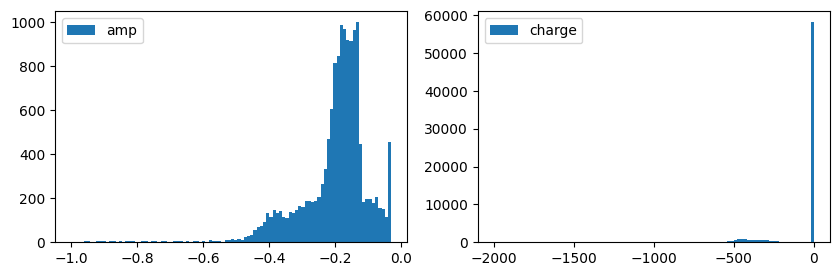

In [115]:
channel=0
plt.figure(figsize=(10,3))
plt.subplot(1,2,1)
a=plt.hist(amp[:, channel-4], bins=100, range=(-1, -0.03), label='amp')
plt.legend()
plt.subplot(1,2,2)
b=plt.hist(charges[:, channel-4], bins=100, range=(-2000, 0), label='charge')
plt.legend()

index=np.argmax(b[0])
print(np.max(b[0]))
edge1=b[1][index]
edge2=b[1][index+1]
print(edge1, edge2, edge1-edge2)
centers=np.where( (charges[:, channel-4]>=-5900) & (charges[:, channel-4]<=-5300) )[0]
#print(centers)
#print(np.where( (charges[:, channel-4]>=edge1) & (charges[:, channel-4]<=edge2) )[0])
print(np.mean(amp[centers, channel-4]))

(100000, 12, 1024)
channel: 11 baseline: 0.002997 amp: -0.00197 charge 1.908 lead_edge 5.377 trailing_edge 5.933
5.377 5.933


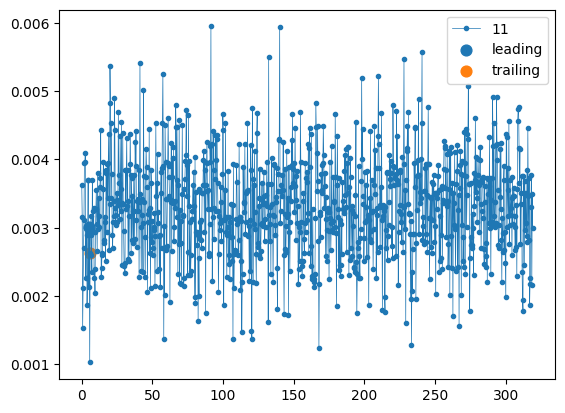

In [116]:
print(waveform.shape)
event= 70
#tra 5 e 13
list = [4,5,6,7,8,9,10,11,12,13,14,15]
list=[0,1,2,3,4,5,6, 7,8,9,10,11]
list=[11]
sampling=0.312
for channel in list:
    time=np.arange(1024)
    plt.plot(time*sampling, waveform[event][channel], '.-', label='{}'.format(channel), linewidth=0.5)
    print("channel:", channel, "baseline:",  baselines[event][channel],"amp:", amp[event][channel], "charge", charges[event][channel], "lead_edge", lead_edge[event][channel], "trailing_edge", t_edge[event][channel] )
    t1=lead_edge[event][channel]
    t2=t_edge[event][channel]
    print(t1,t2)
    plt.scatter( t1, waveform[event][channel][int(t1/sampling)],s=60 ,  label='leading'  )
    plt.scatter( t2, waveform[event][channel][int(t2/sampling)],s=60,  label='trailing'  )
    plt.legend()
    #plt.xlim(400,600)
    #plt.ylim(-0.01, 0.1)

plt.legend()

In [117]:
canale=[4,5,6,7,8,9,10,11,12,13,14,15]
#l'ultimo è il 15
carica_gamma=np.array([0,0,0,0, -440, -740, 0, -740,0,0, -280, -430, -450,  -660, -650,  -940 ])


coppia=np.array([ [4,5], [6,7], [8,9], [10,11], [12,13], [14,15] ])

firstch = coppia[:,0]
secondch = coppia[:,1]

map = np.repeat(-1,16)

for i in range(16):
    if np.where(coppia.flatten()==i)[0].size>0:
        map[i]=np.where(coppia.flatten()==i)[0]
print(map)

n=5
firstch_limits=    [  [carica_gamma[coppia[i][0]]+n*0.07*carica_gamma[coppia[i][0]], carica_gamma[coppia[i][0]]-n*n*0.07*carica_gamma[coppia[i][0]] ] for i in range(len(coppia))]
secondch_limits= [  [carica_gamma[coppia[i][1]]+n*0.07*carica_gamma[coppia[i][1]], carica_gamma[coppia[i][1]]-n*0.07*carica_gamma[coppia[i][1]] ] for i in range(len(coppia))   ]

print(carica_gamma)
print(firstch_limits)
print(secondch_limits)

[-1 -1 -1 -1  0  1  2  3  4  5  6  7  8  9 10 11]
[   0    0    0    0 -440 -740    0 -740    0    0 -280 -430 -450 -660
 -650 -940]
[[-594.0, 330.0000000000001], [0.0, 0.0], [0.0, 0.0], [-378.0, 210.00000000000006], [-607.5, 337.5000000000001], [-877.5, 487.5000000000002]]
[[-999.0, -481.0], [-999.0, -481.0], [0.0, 0.0], [-580.5, -279.5], [-891.0, -429.0], [-1269.0, -611.0]]


/var/folders/0y/k6xzqpg904jd8jnjbgq30b4w0000gn/T/ipykernel_36592/3691720274.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  map[i]=np.where(coppia.flatten()==i)[0]


In [118]:
paired_amp_1 = []
paired_charge_1 = []
paired_letime_1 = []
paired_wf_1 = []

paired_amp_2 = []
paired_charge_2 = []
paired_letime_2 = []
paired_wf_2 = []

whichpair=[]

for event in range(N_ev):
    for channel1, channel2, limF, limS in zip(map[firstch],map[secondch],firstch_limits,secondch_limits):
        #controllo se c'è un evento nel primo della coppia
        if(charges[event][channel1] >= limF[0] and charges[event][channel1] <= limF[1]):
            #se sì, vedo se ce n'è uno anche nel secondo della coppia
            if (charges[event][channel2] >= limS[0] and charges[event][channel2] <= limS[1]):
                #salvo i parametri del primo canale della coppia
                whichpair.append(channel1)

                paired_amp_1.append(amp[event][channel1])
                paired_charge_1.append(charges[event][channel1])
                paired_letime_1.append(lead_edge[event][channel1])
                paired_wf_1.append(waveform[event][channel1])

                paired_amp_2.append(amp[event][channel2])
                paired_charge_2.append(charges[event][channel2])
                paired_letime_2.append(lead_edge[event][channel2])
                paired_wf_2.append(waveform[event][channel2])

import gc
del waveform
gc.collect()

18660

32100


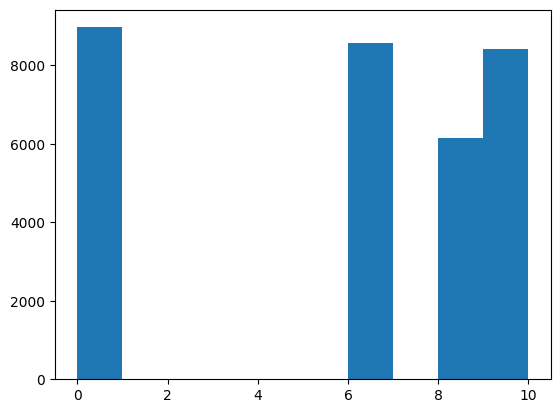

In [119]:
plt.hist(whichpair)

print(len(paired_amp_1))

5.5562505e-05 0.00062306743 0.0031694998 0.0008431264
252 280 -8.736
0.014022682 0.018997094
264 279 -4.68


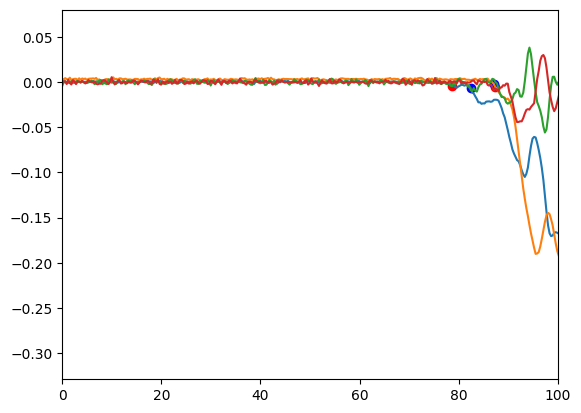

In [35]:
time=np.arange(1024)
sampling=0.312
i=2500
n_sigma=7
plt.plot(time*sampling, paired_wf_1[i] )
plt.plot(time*sampling, paired_wf_2[i])
plt.xlim(0, 100)
bl1 = np.mean(paired_wf_1[i][:32])
bl2 = np.mean(paired_wf_2[i][:32])

sigma_bl_1 = np.std(paired_wf_1[i][:32])
sigma_bl_2 = np.std(paired_wf_2[i][:32])
print(bl1,sigma_bl_1,  bl2, sigma_bl_2)

        # Find the index where the waveform crosses the threshold
t1 = np.where(paired_wf_1[i] < bl1 - n_sigma*sigma_bl_1)[0][0]
t2 = np.where(paired_wf_2[i] < bl2 - n_sigma*sigma_bl_2)[0][0]
plt.scatter(t1*sampling, paired_wf_1[i][t1], color='r' )
plt.scatter(t2*sampling, paired_wf_2[i][t2], color='r')
        # Calculate the time resolution
time_diff = t1 - t2
print(t1, t2, time_diff*sampling)


b=np.gradient(paired_wf_1[i], sampling)
c=np.gradient(paired_wf_2[i], sampling)
plt.plot(time*sampling, b)
plt.plot(time*sampling, c)
n_sigma=4
print(np.std(b),np.std(c) )
t1a= np.where(np.abs(b) >  n_sigma*np.std(b[:t1]))[0][0]
t2a = np.where(np.abs(c)> n_sigma*np.std(c[:t2]))[0][0]

plt.scatter(t1a*sampling, paired_wf_1[i][t1a], color='b' )
plt.scatter(t2a*sampling, paired_wf_2[i][t2a], color='b')
time_diff = t1a - t2a
print(t1a, t2a, time_diff*sampling)

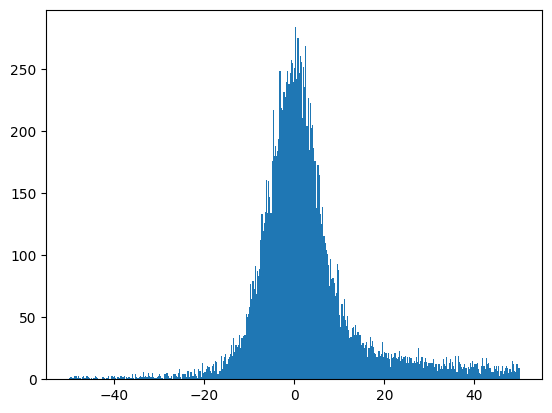

In [15]:
timeres=np.array(paired_letime_1) - np.array(paired_letime_2)
a=plt.hist(timeres, bins=400, range=(-50,50))

## Metodo 1: fixed treshold con baseline

[11.544  7.176  1.248 ...  4.368  3.12   3.744]


Text(0.5, 0, 'Delta t [ns]')

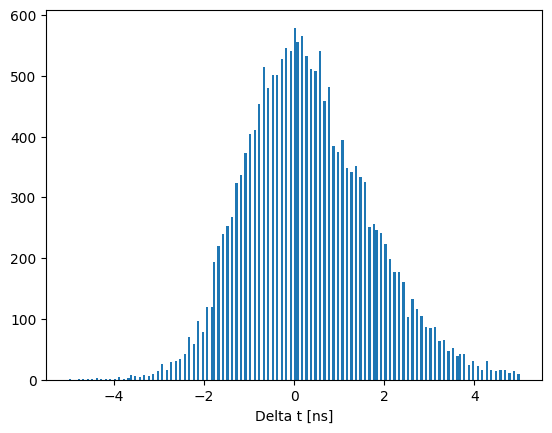

In [36]:
#analisi con la waveform

timeresol = []
badres = []

threshold=-0.02

for event in range(len(paired_wf_1)):
    try:
        bl1 = np.mean(paired_wf_1[event][:16])
        bl2 = np.mean(paired_wf_2[event][:16])
        sigma_bl_1 = np.std(paired_wf_1[event][:16])
        sigma_bl_2 = np.std(paired_wf_2[event][:16])

        # Find the index where the waveform crosses the threshold
        t1 = np.where(paired_wf_1[event] < bl1 - 0.02)[0][0]
        t2 = np.where(paired_wf_2[event] < bl2 - 0.02)[0][0]

        # Calculate the time resolution
        time_diff = t1 - t2
        timeresol.append(time_diff)
        if(abs(time_diff) > 20): badres.append(event) #

    except IndexError:
        # Skip events where the condition is not met
        continue

timeresol = np.array(timeresol) * 0.312  # Assuming the time resolution is in nanoseconds
print(timeresol)
timeresol=np.array(timeresol)*0.312
_= plt.hist(timeresol, bins=200, range=(-5,5))
plt.xlabel('Delta t [ns]')
#plt.yscale("log")

## Metodo 2: fixed threshold con baseline e rms

[ 1.248 -3.432 -0.624 ...  4.68   0.312  1.56 ]


Text(0.5, 0, 'Delta t [ns]')

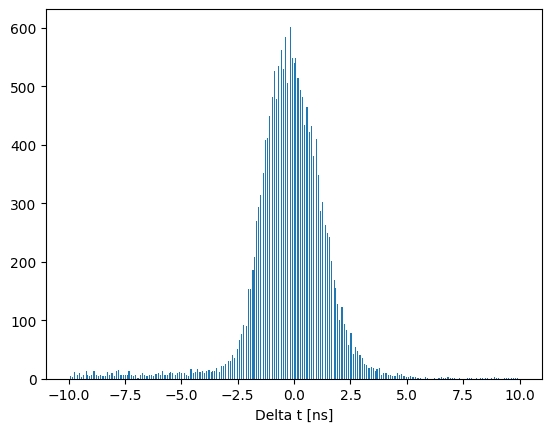

In [37]:
#analisi con la waveform

timeresol = []
badres = []

threshold=-0.02
n_sigma=7

for event in range(len(paired_wf_1)):
    try:
        bl1 = np.mean(paired_wf_1[event][:32])
        bl2 = np.mean(paired_wf_2[event][:32])
        sigma_bl_1 = np.std(paired_wf_1[event][:32])
        sigma_bl_2 = np.std(paired_wf_2[event][:32])

        # Find the index where the waveform crosses the threshold
        t1 = np.where(paired_wf_1[event] < bl1 - n_sigma*sigma_bl_1)[0][0]
        t2 = np.where(paired_wf_2[event] < bl2 - n_sigma*sigma_bl_2)[0][0]

        # Calculate the time resolution
        time_diff = t1 - t2
        timeresol.append(time_diff)
        if(abs(time_diff) > 20): badres.append(event) #

    except IndexError:
        # Skip events where the condition is not met
        continue

timeresol = np.array(timeresol) * 0.312  # Assuming the time resolution is in nanoseconds
print(timeresol)
timeresol=np.array(timeresol)*0.312
_= plt.hist(timeresol, bins=400, range=(-10,10))
plt.xlabel('Delta t [ns]')
#plt.yscale("log")


## Metodo 3: mobile threshold

[2.496 0.312 0.312 ... 1.872 1.248 4.056]


5.790985017581071

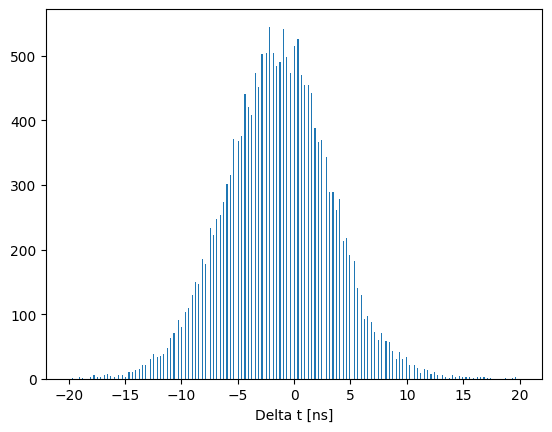

In [106]:
#analisi con la waveform

timeresol = []
badres = []

frac=0.25
n_sigma=7


for event in range(len(paired_wf_1)):
    try:
        bl1 = np.mean(paired_wf_1[event][:32])
        bl2 = np.mean(paired_wf_2[event][:32])
        sigma_bl_1 = np.std(paired_wf_1[event][:32])
        sigma_bl_2 = np.std(paired_wf_2[event][:32])

        # Find the index where the waveform crosses the threshold
        t1 = np.where(paired_wf_1[event] < frac*np.min(paired_wf_1[event]))[0][0]
        t2 = np.where(paired_wf_2[event] < frac*np.min(paired_wf_2[event]))[0][0]

        # Calculate the time resolution
        time_diff = t1 - t2
        timeresol.append(time_diff)
        if(abs(time_diff) > 20): badres.append(event) #

    except IndexError:
        # Skip events where the condition is not met
        continue

timeresol = np.array(timeresol) * 0.312  # Assuming the time resolution is in nanoseconds
print(timeresol)
timeresol=np.array(timeresol)
_= plt.hist(timeresol, bins=400, range = (-20, 20))
plt.xlabel('Delta t [ns]')
#plt.yscale("log")

np.std(timeresol)

## Metodo 4: provo a introdurre una qualche forma di derivata

In [19]:
#analisi con la waveform

timeresol = []
badres = []

frac=0.25
n_sigma=7


for event in range(len(paired_wf_1)):
    try:
        bl1 = np.mean(paired_wf_1[event][:32])
        bl2 = np.mean(paired_wf_2[event][:32])
        sigma_bl_1 = np.std(paired_wf_1[event][:32])
        sigma_bl_2 = np.std(paired_wf_2[event][:32])

        # Find the index where the waveform crosses the threshold
        t1 = np.where(paired_wf_1[event] < frac*np.min(paired_wf_1[event]))[0][0]
        t2 = np.where(paired_wf_2[event] < frac*np.min(paired_wf_2[event]))[0][0]

        # Calculate the time resolution
        
        if(abs(time_diff) > 20): badres.append(event) #

        grad1=np.gradient(paired_wf_1[i], sampling)
        grad2=np.gradient(paired_wf_2[i], sampling)


        t1_grad= np.where(np.abs(grad1) >  5*np.std(grad1[:t1]))[0][0]
        t2_grad = np.where(np.abs(grad2)>  5*np.std(grad2[:t2]))[0][0]
        time_diff = t1_grad - t2_grad
        timeresol.append(time_diff)


    except IndexError:
        # Skip events where the condition is not met
        continue



/Users/samuele/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/samuele/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/samuele/Library/Python/3.9/lib/python/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)


[-4.68  -4.68  -5.616 ...  1.248 -4.68  -4.68 ]


Text(0.5, 0, 'Delta t [ns]')

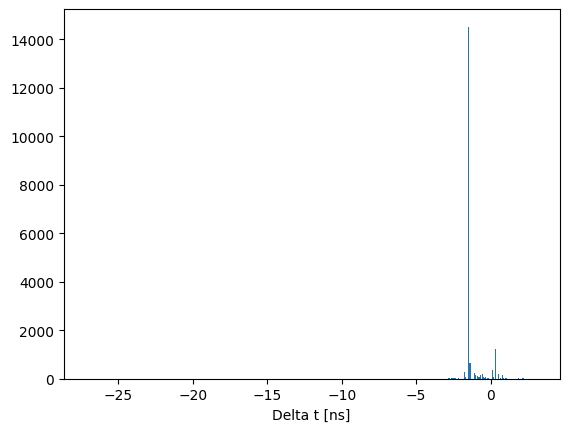

In [20]:
timeresol = np.array(timeresol) * 0.312  # Assuming the time resolution is in nanoseconds
print(timeresol)
timeresol=np.array(timeresol)*0.312
_= plt.hist(timeresol, bins=400)
plt.xlabel('Delta t [ns]')
#plt.yscale("log")


In [ ]:
my_ledge = np.zeros(waveform.shape[0], waveform.shape[1])

thres = -2 / 1000 #mV

for evt in range(waveform.shape[0]):
    for ch in range(waveform.shape[1]):
        i = 0
        found = False
        bsl = baselines[evt][ch]
        wvfrm = waveform[evt][ch]
        np.where(np.diff(np.sign(wvfrm - bsl - thres)))[0]


5.2e-05

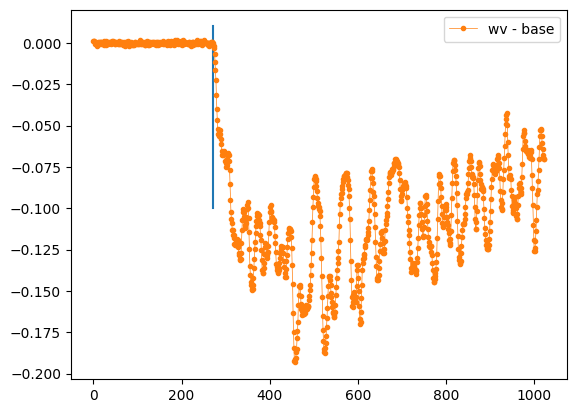

In [38]:
event=2
channel = 0
thres = -0.001

bsl = baselines[event]


zeros = np.where(np.diff(np.sign(waveform[event][channel] - bsl[channel] - thres)))[0] + 1
zero = 0
i_ledge = 0
ledge = 0



for zero in zeros:
    if (waveform[event][channel][zero:zero + 30] - bsl[channel]).max() > thres:
        continue
    else:
        i_ledge = zero
        if (i_ledge > 994) or (i_ledge < 16):
            i_ledge = 0
        ledge = zero * sampling



plt.plot([i_ledge] * 2, [-0.1, 0.01])
plt.plot(time, waveform[event][channel] - bsl[channel], '.-',  linewidth=0.5, label ="wv - base")
plt.legend()
#plt.ylim([-0.01,0])
bsl[channel] #if base < -0.002?


In [12]:
for zero in zeros:
    if (waveform[event][channel][zero:zero + 30] - baselines[event][channel]).max() > thres:
        continue
    else:
        i_ledge = zero
        ledge = zero * sampling

print(i_ledge)

272


In [206]:
times_01 = ledges[:, 0] - ledges[:, 1]


(-10.0, 10.0)

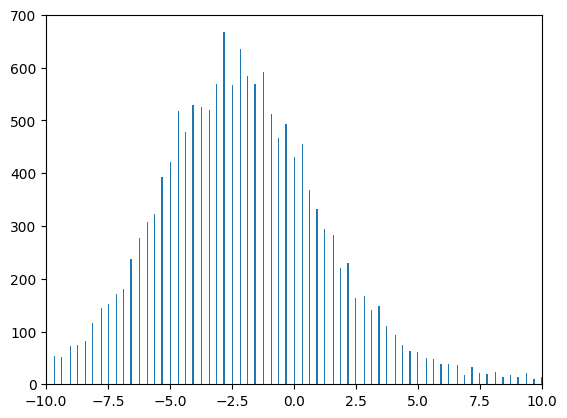

In [215]:
times_01 = times_01[np.isfinite(times_01)]
_ = plt.hist(times_01 * 0.312, bins = 400, range = (-10, 10))
plt.xlim([-10, 10])


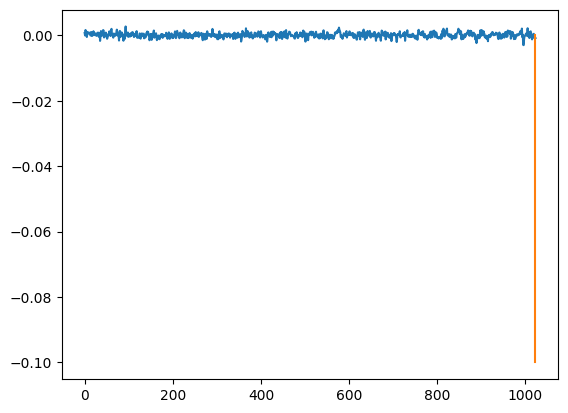

In [189]:
plt.plot(range(1024), waveform[0][7])
plt.plot([ledges[0][7]] * 2, [-0.1, 0])


In [123]:
wf_1_len = len(paired_wf_1)
wf_2_len = len(paired_wf_2)
print(np.array(paired_wf_1).shape, np.array(paired_wf_2).shape)
new_wf_1 = np.array(paired_wf_1).reshape([np.array(paired_wf_1).shape[0], 1, np.array(paired_wf_1).shape[1]])
new_wf_2 = np.array(paired_wf_2).reshape([np.array(paired_wf_2).shape[0], 1, np.array(paired_wf_2).shape[1]])

del wf_1_len
del wf_2_len
gc.collect()

(32100, 1024) (32100, 1024)


796

In [124]:
def timing_from_wf(wf_arr, thresold, samp):


    ledges = np.zeros([wf_arr.shape[0], wf_arr.shape[1]])
    ledges[:, :] = np.NaN
    thres = thresold #-0.001
    sampling = samp

    for evt in range(wf_arr.shape[0]):
        
        
        for ch in range(wf_arr.shape[1]):
            bsl = wf_arr[evt][ch][4:32].mean()

            zeros = np.where(np.diff(np.sign(wf_arr[evt][ch] - bsl - thres)))[0] + 1
            zero = 0
            i_ledge = np.NaN
            ledge = np.NaN

            for zero in zeros:
                if (wf_arr[evt][ch][zero:zero + 30] - bsl).max() < thres:
                    i_ledge = zero
                    if ((i_ledge > 994) or (i_ledge < 32)):
                        i_ledge = np.NaN
                    ledge = i_ledge * sampling
                    #print(ledge)
                    ledges[evt][ch] = ledge
                    break

    return ledges


5.467194117749597


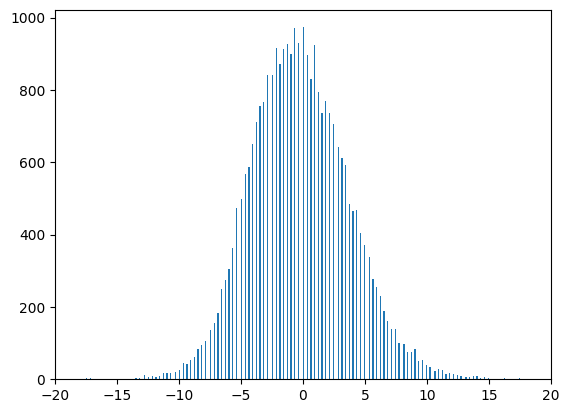

In [129]:
ledg_1 = timing_from_wf(new_wf_1, -0.005, 1)
ledg_2 = timing_from_wf(new_wf_2, -0.005, 1)

times = ledg_1[:, 0] - ledg_2[:, 0]

to_drop = np.isfinite(times)

times = times[to_drop]
ledg_1=ledg_1[to_drop]
ledg_2=ledg_2[to_drop]
new_wf_1=new_wf_1[to_drop]
new_wf_2=new_wf_2[to_drop]

edg, bin, _ = plt.hist(times * 0.312 , bins = 400, range = (-20, 20))
plt.xlim(-20,20)
print(np.std(times) * 0.312)


In [106]:
print(times[2])
print(ledg_1[2]-ledg_2[2])

-19.0
[-19.]


In [107]:
bad_times_idx=np.where(np.abs(times)<15)[0]
print(bad_times_idx)

[    0     1     3 ... 17687 17688 17689]


rnd = 7
(ledg_2[rnd][0] - ledg_1[rnd][0]) = -2.0


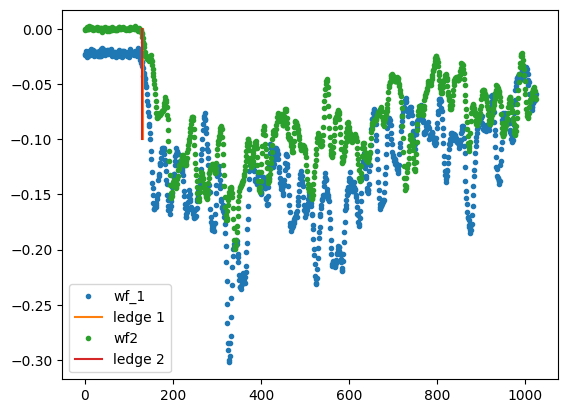

In [113]:
#from random import randint
#rnd = randint(0 , wf_1_len)

rnd = bad_times_idx[5]
plt.plot(range(1024), new_wf_1[rnd][0]*2.7, label  ="wf_1", ls = "", marker = ".")
plt.plot([ledg_1[rnd][0]] * 2, [-0.1, 0], label = "ledge 1")

plt.plot(range(1024), new_wf_2[rnd][0], label = "wf2", ls = "", marker = ".")
plt.plot([ledg_2[rnd][0]] * 2, [-0.1, 0], label = "ledge 2")

plt.legend()

print(f'{rnd = }')
print(f'{(ledg_2[rnd][0] - ledg_1[rnd][0]) = }')

#plt.ylim([-0.5, 0.005])
#plt.xlim([min(ledg_1[rnd][0], ledg_2[rnd][0]) - 50, 
#          max(ledg_1[rnd][0], ledg_2[rnd][0]) + 50])
#plt.xlim(225,1024)

In [74]:
brutti = np.array([14657, 17475])

(1024,)

In [103]:
wf_arr = new_wf_1[34][0].reshape([1, 1, 1024])

ledges = np.zeros([wf_arr.shape[0], wf_arr.shape[1]])
ledges[:, :] = np.NaN
thres = -0.001  #-0.001
sampling = 1

for evt in range(wf_arr.shape[0]):
    bsl = baselines[evt]
    
    
    for ch in range(wf_arr.shape[1]):
        bsl = wf_arr[evt][ch][4:32].mean()
        print(bsl)
        zeros = np.where(np.diff(np.sign(wf_arr[evt][ch] - bsl - thres)))[0] + 1
        zero = 0
        i_ledge = np.NaN
        ledge = np.NaN

        for zero in zeros:
            if (wf_arr[evt][ch][zero:zero + 30] - bsl).max() < thres:
                i_ledge = zero
                if ((i_ledge > 994) or (i_ledge < 16)):
                    i_ledge = np.NaN
                ledge = i_ledge * sampling
                #print(ledge)
                ledges[evt][ch] = ledge

-0.007952107


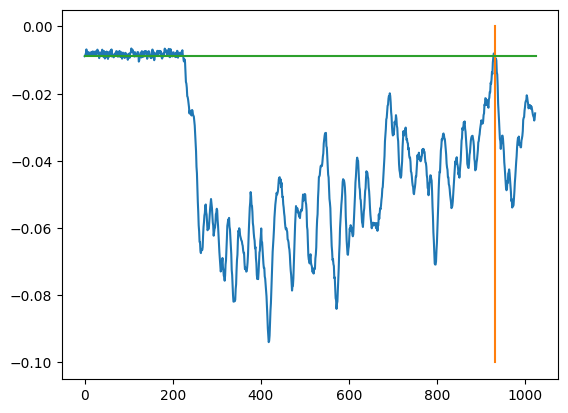

In [105]:
plt.plot(range(1024), new_wf_1[34][0])
plt.plot([ledg_1[34][0]] * 2, [-0.1, 0])
plt.plot([0, 1024], [-0.0079 - 0.001] * 2)

# New timing

(32100, 1024) (32100, 1024)


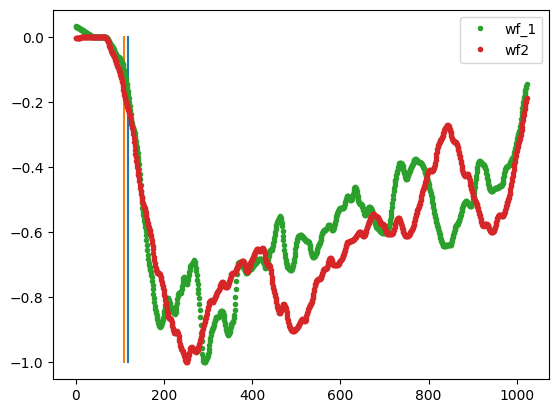

In [130]:
rnd = 0

wf_1_len = len(paired_wf_1)
wf_2_len = len(paired_wf_2)
print(np.array(paired_wf_1).shape, np.array(paired_wf_2).shape)

new_wf_1 = np.array(paired_wf_1).reshape([np.array(paired_wf_1).shape[0], 1, np.array(paired_wf_1).shape[1]])
new_wf_2 = np.array(paired_wf_2).reshape([np.array(paired_wf_2).shape[0], 1, np.array(paired_wf_2).shape[1]])


n = 80
for evt in range(new_wf_1.shape[0]):
    for ch in range(new_wf_1.shape[1]):
        bsl_1 = new_wf_1[evt, ch, 0:32].mean()
        bsl_2 = new_wf_2[evt, ch, 0:32].mean()
        new_wf_1[evt, ch, :] = np.convolve(new_wf_1[evt, ch], [1/n] * n, mode = "same") - bsl_1
        new_wf_2[evt, ch, :] = np.convolve(new_wf_2[evt, ch], [1/n] * n, mode = "same") - bsl_2


new_wf_1 = -norm(-new_wf_1.reshape(-1, 1024), norm = "max", axis = 1, copy = True, return_norm = False)
new_wf_2 = -norm(-new_wf_2.reshape(-1, 1024), norm = "max", axis = 1, copy = True, return_norm = False)

threshold = -0.175


plt.plot( [np.where(np.diff(np.sign(new_wf_1[0] - threshold)))[0][0]] * 2, [-1, 0])
plt.plot( [np.where(np.diff(np.sign(new_wf_2[0] - threshold)))[0][0]] * 2, [-1, 0])


plt.plot(range(1024), new_wf_1[rnd], label  ="wf_1", ls = "", marker = ".")
plt.plot(range(1024), new_wf_2[rnd], label = "wf2", ls = "", marker = ".")

plt.legend()


In [131]:
ledges1 = np.zeros(new_wf_1.shape[0])
ledges2 = np.zeros(new_wf_2.shape[0])

for evt in range(new_wf_1.shape[0]):
    ledges1[evt] = np.where(np.diff(np.sign(new_wf_1[evt] - threshold)))[0][0]
    ledges2[evt] = np.where(np.diff(np.sign(new_wf_2[evt] - threshold)))[0][0]

IndexError: index 0 is out of bounds for axis 0 with size 0

0.17553275526278816

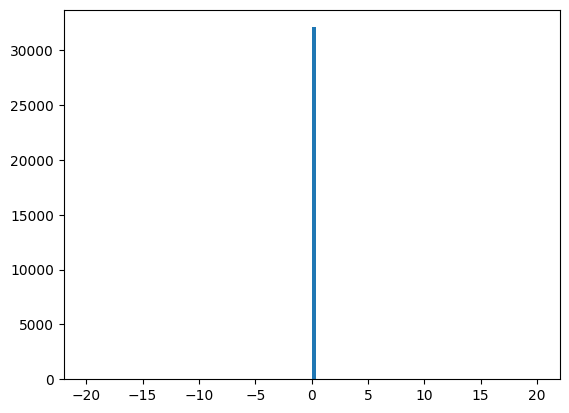

In [132]:
_ = plt.hist((ledges2 - ledges1) * 0.312, bins= 100, range = [-20, 20])
np.std((ledges2 - ledges1) * 0.312)

In [96]:
stds = np.zeros([70, 7])
i = 0
j = 0
for n in [4, 8, 16, 30, 60, 70, 80]:
    for thr in [-0.05, -0.075, -0.1, -0.125, -0.15, -0.175, -0.2]:
        print(f'{n = }, \t {thr = }\t')

        wf_1_len = len(paired_wf_1)
        wf_2_len = len(paired_wf_2)

        new_wf_1 = np.array(paired_wf_1).reshape([np.array(paired_wf_1).shape[0], 1, np.array(paired_wf_1).shape[1]])
        new_wf_2 = np.array(paired_wf_2).reshape([np.array(paired_wf_2).shape[0], 1, np.array(paired_wf_2).shape[1]])

        for evt in range(new_wf_1.shape[0]):
            for ch in range(new_wf_1.shape[1]):
                bsl_1 = new_wf_1[evt, ch, 0:32].mean()
                bsl_2 = new_wf_2[evt, ch, 0:32].mean()
                new_wf_1[evt, ch, :] = np.convolve(new_wf_1[evt, ch], [1/n] * n, mode = "same") - bsl_1
                new_wf_2[evt, ch, :] = np.convolve(new_wf_2[evt, ch], [1/n] * n, mode = "same") - bsl_2


        new_wf_1 = -norm(-new_wf_1.reshape(-1, 1024), norm = "max", axis = 1, copy = True, return_norm = False)
        new_wf_2 = -norm(-new_wf_2.reshape(-1, 1024), norm = "max", axis = 1, copy = True, return_norm = False)

        threshold = thr
                

        ledges1 = np.zeros(new_wf_1.shape[0])
        ledges2 = np.zeros(new_wf_2.shape[0])

        for evt in range(new_wf_1.shape[0]):
            ledges1[evt] = np.where(np.diff(np.sign(new_wf_1[evt] - threshold)))[0][0]
            ledges2[evt] = np.where(np.diff(np.sign(new_wf_2[evt] - threshold)))[0][0]

        stds[i][j] = np.std((ledges2 - ledges1) * 0.312)
        j += 1
    j = 0
    i += 1

n = 4, 	 thr = -0.05	
n = 4, 	 thr = -0.075	
n = 4, 	 thr = -0.1	
n = 4, 	 thr = -0.125	
n = 4, 	 thr = -0.15	
n = 4, 	 thr = -0.175	
n = 4, 	 thr = -0.2	
n = 8, 	 thr = -0.05	
n = 8, 	 thr = -0.075	
n = 8, 	 thr = -0.1	
n = 8, 	 thr = -0.125	
n = 8, 	 thr = -0.15	
n = 8, 	 thr = -0.175	
n = 8, 	 thr = -0.2	
n = 16, 	 thr = -0.05	
n = 16, 	 thr = -0.075	
n = 16, 	 thr = -0.1	
n = 16, 	 thr = -0.125	
n = 16, 	 thr = -0.15	
n = 16, 	 thr = -0.175	
n = 16, 	 thr = -0.2	
n = 30, 	 thr = -0.05	
n = 30, 	 thr = -0.075	
n = 30, 	 thr = -0.1	
n = 30, 	 thr = -0.125	
n = 30, 	 thr = -0.15	
n = 30, 	 thr = -0.175	
n = 30, 	 thr = -0.2	
n = 60, 	 thr = -0.05	
n = 60, 	 thr = -0.075	
n = 60, 	 thr = -0.1	
n = 60, 	 thr = -0.125	
n = 60, 	 thr = -0.15	
n = 60, 	 thr = -0.175	
n = 60, 	 thr = -0.2	
n = 70, 	 thr = -0.05	
n = 70, 	 thr = -0.075	
n = 70, 	 thr = -0.1	
n = 70, 	 thr = -0.125	
n = 70, 	 thr = -0.15	
n = 70, 	 thr = -0.175	
n = 70, 	 thr = -0.2	
n = 80, 	 thr = -0.05	
n = 80, 	 thr = -0.

Text(0, 0.5, 'std [ns]')

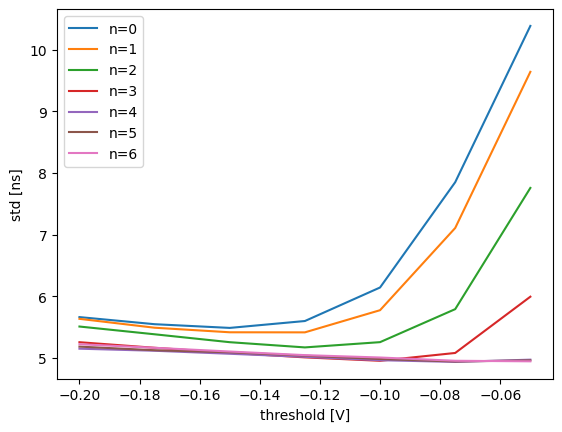

In [97]:
for n in range(7):
    plt.plot([-0.05, -0.075, -0.1, -0.125, -0.15, -0.175, -0.2], stds[n], label = f'{n=}')
plt.legend()
plt.xlabel("threshold [V]")
plt.ylabel("std [ns]")